In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE


In [62]:
df=pd.read_csv('Advertising Sales Channel Prediction',header=0,names=['TV','Radio','Newspaper','Sales'])
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [63]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [64]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [65]:
df.sample(7)

,TV,Radio,Newspaper,Sales
116,75.1,35.0,52.7,12.6
85,213.5,43.0,33.8,21.7
28,240.1,16.7,22.9,15.9
19,69.2,20.5,18.3,11.3
143,220.5,33.2,37.9,20.1
63,239.3,15.5,27.3,15.7
50,66.9,11.7,36.8,9.7


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

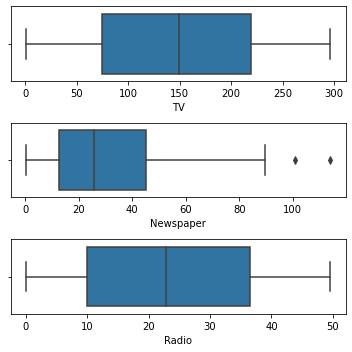

In [12]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

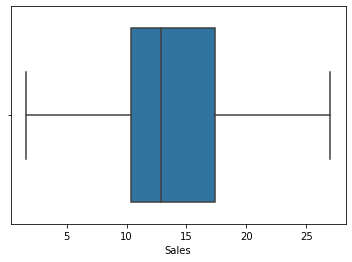

In [13]:
sns.boxplot(df['Sales'])
plt.show()

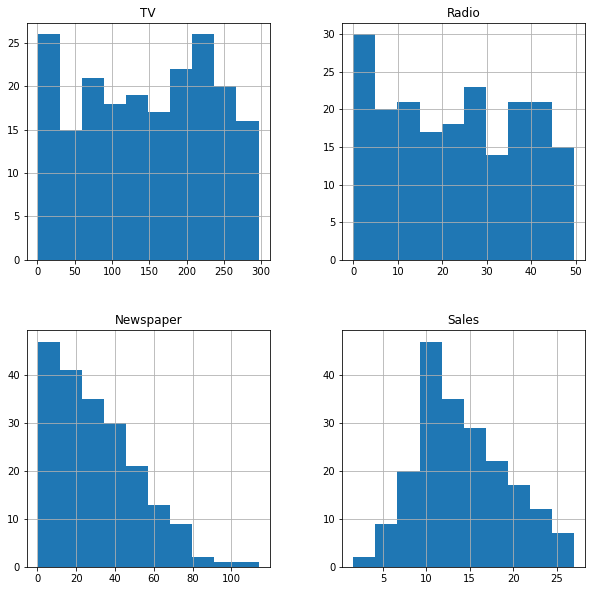

In [14]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

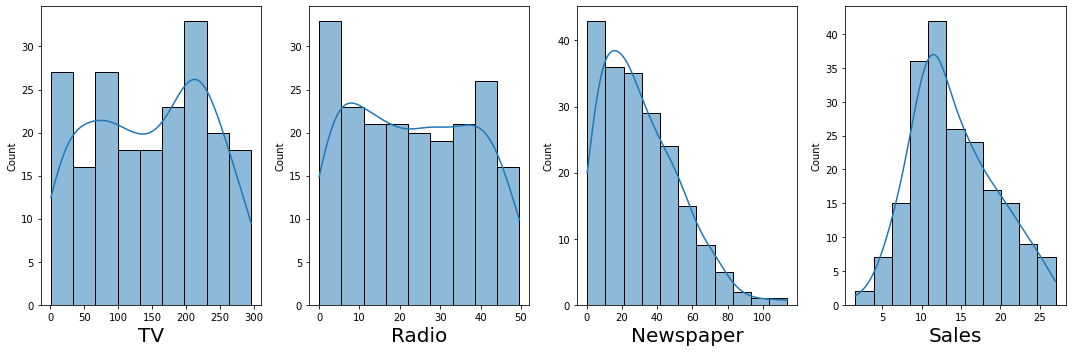

In [15]:
plt.figure(figsize=(15,5),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax=plt.subplot(1,4,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
Radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
Newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
Sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

<Figure size 1440x720 with 0 Axes>

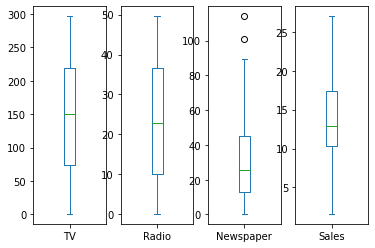

In [16]:
plt.figure(figsize=(20,10))
df.plot(kind='box',subplots=True,layout=(1,4))

<AxesSubplot:xlabel='TV', ylabel='count'>

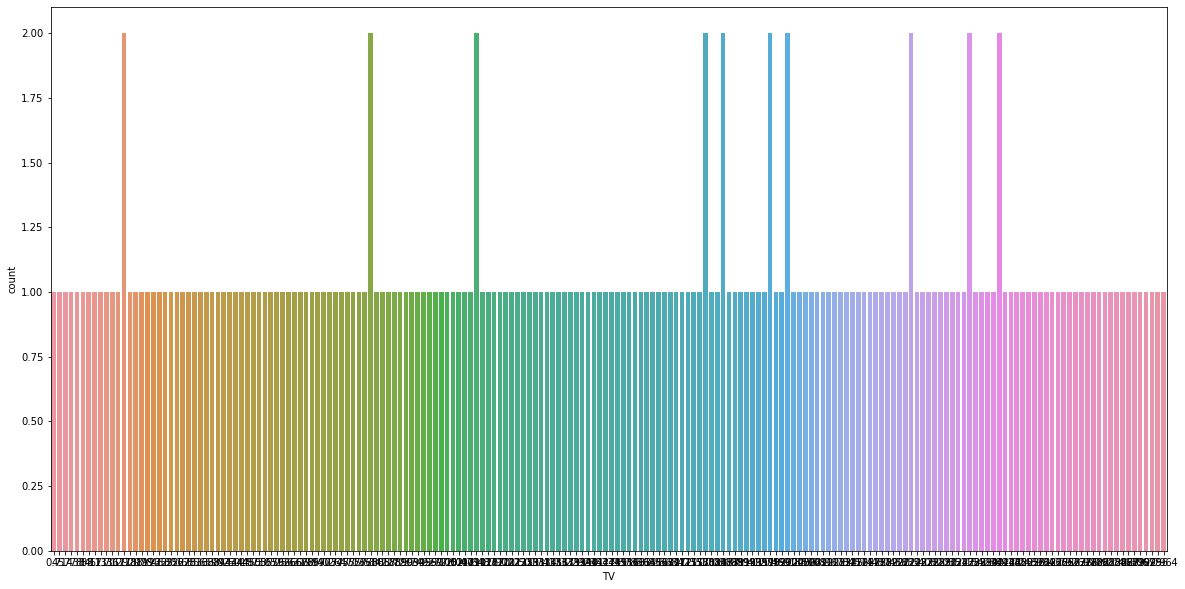

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='TV', data=df)

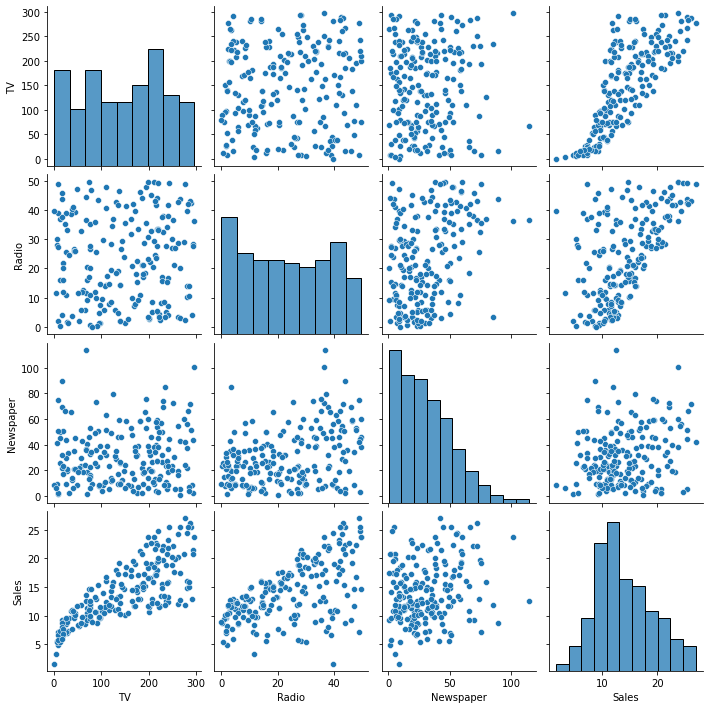

In [18]:
sns.pairplot(df,size=2.5)
plt.show()

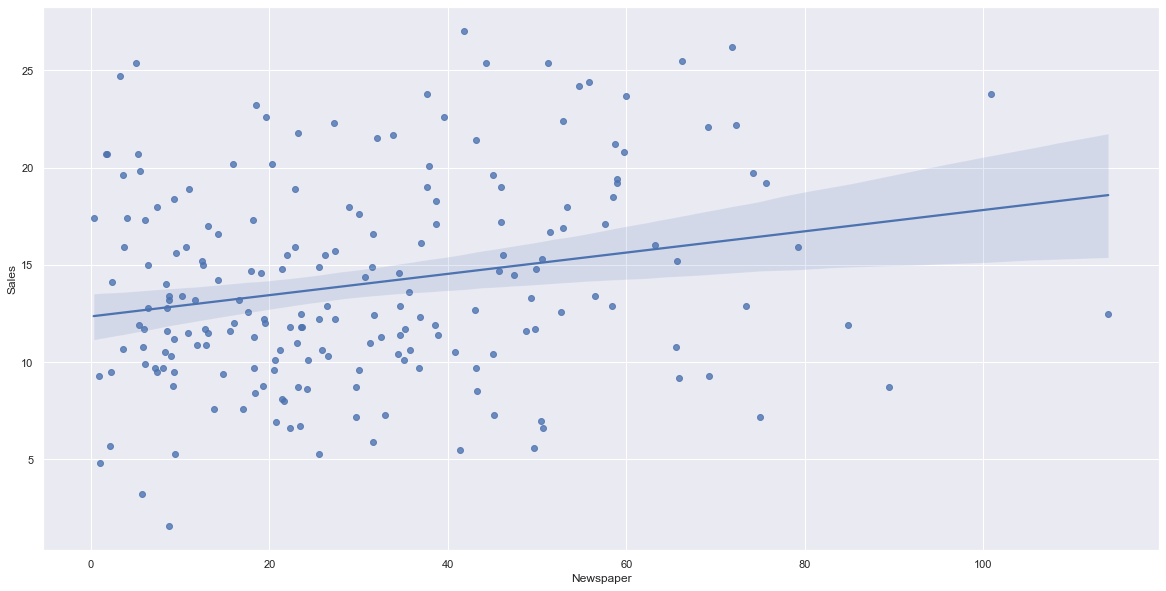

In [19]:
plt.figure(figsize=(20,10))
import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x="Newspaper", y="Sales", data=df)

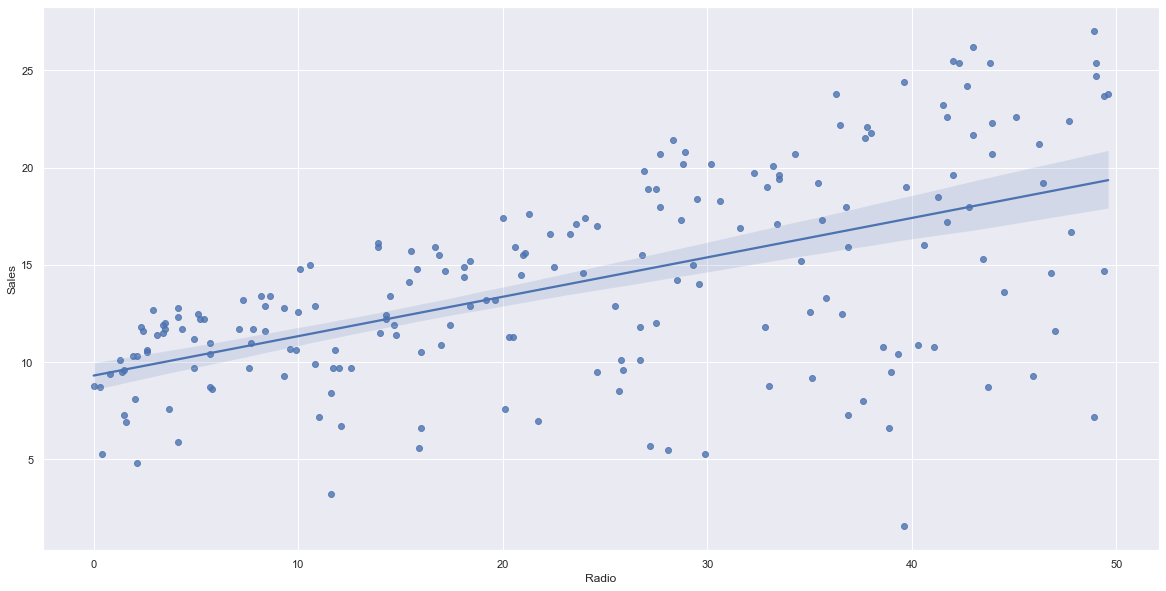

In [20]:
plt.figure(figsize=(20,10))
import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x="Radio", y="Sales", data=df)

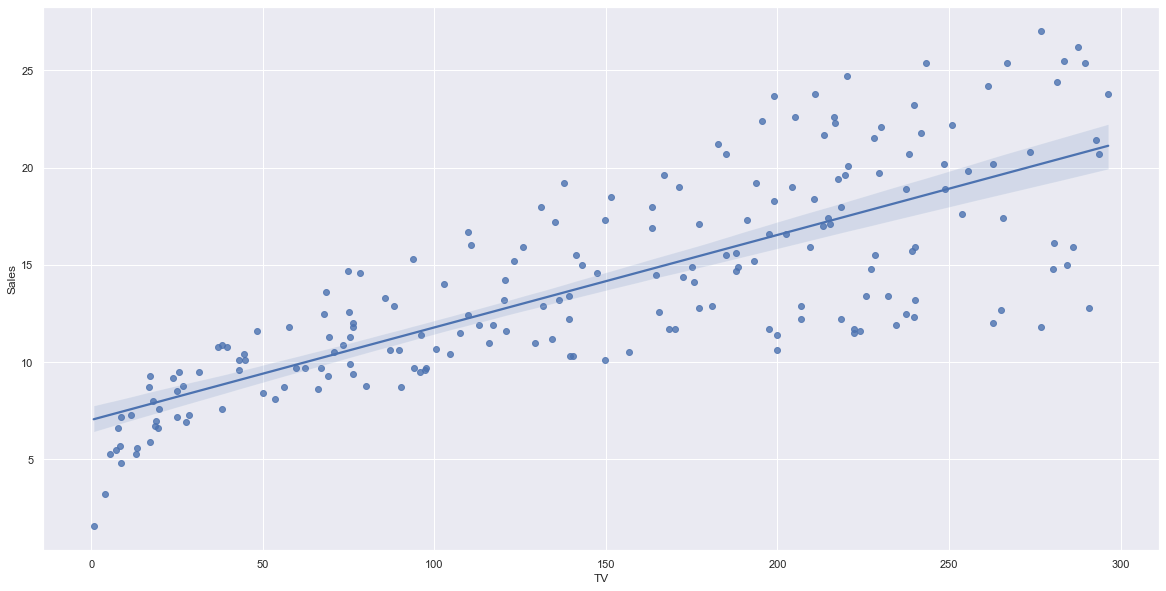

In [21]:
plt.figure(figsize=(20,10))
import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x="TV", y="Sales", data=df)

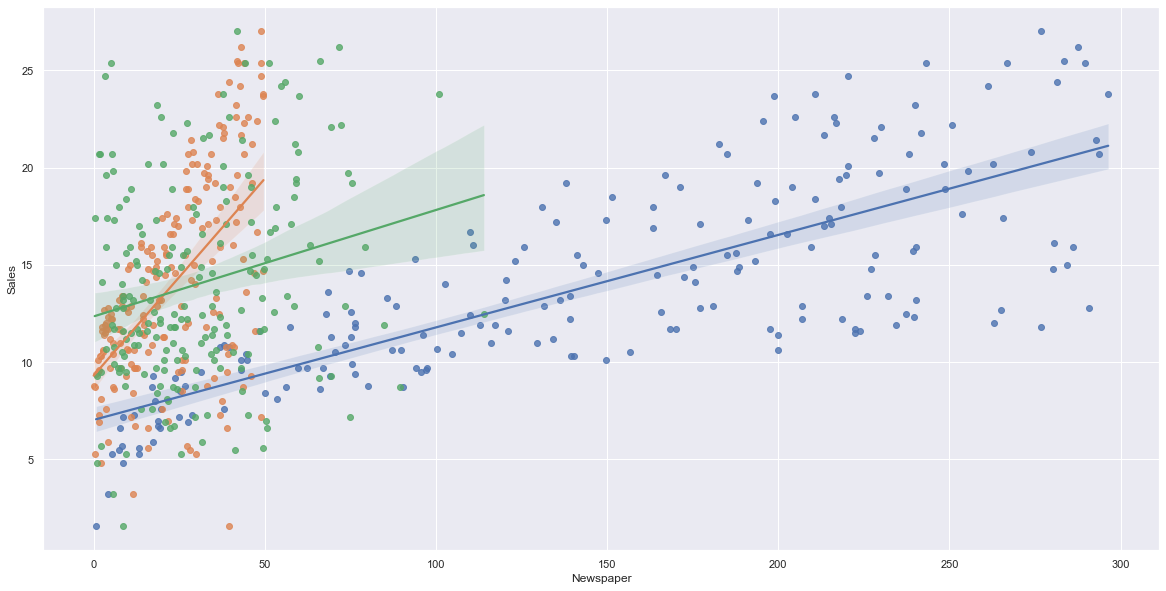

In [22]:
x=['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(20,10))
for i in x:
   
    import seaborn as sns; sns.set_theme(color_codes=True)
    ax = sns.regplot(x=i, y="Sales", data=df)
    
plt.show()

<AxesSubplot:>

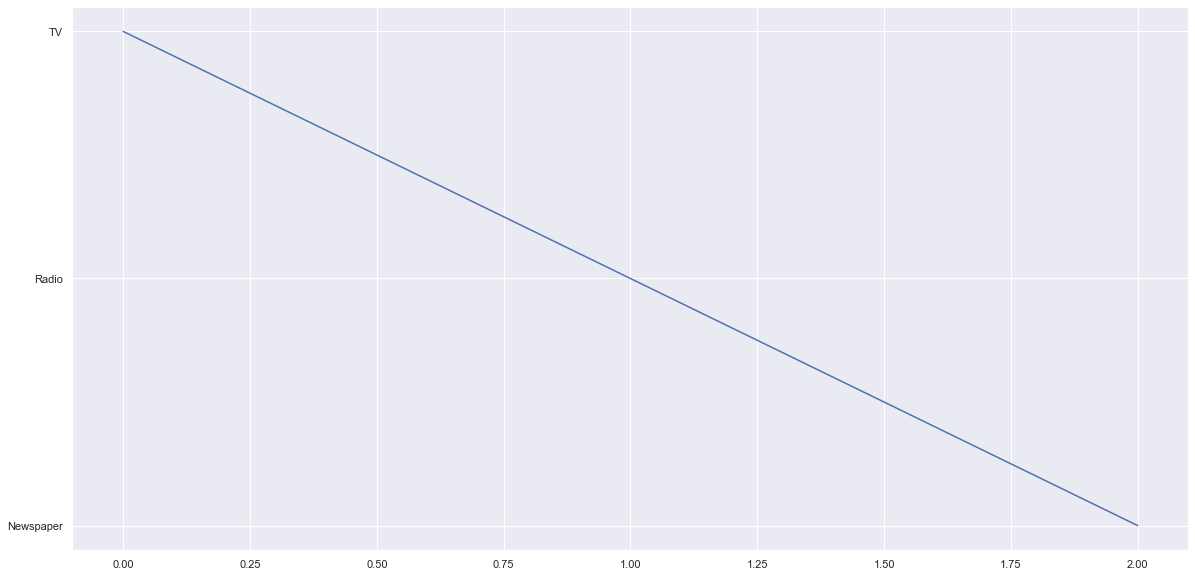

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(data=x)

<AxesSubplot:>

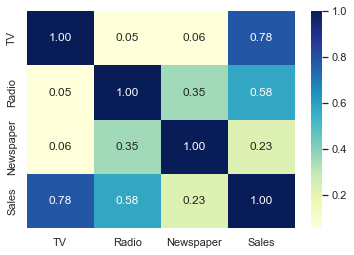

In [24]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, cmap="YlGnBu",fmt=".2f")

In [25]:
### Define X&Y ###

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [27]:
df['Newspaper']=np.sqrt(df['Newspaper'])
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.062388
Sales        0.407571
dtype: float64

In [28]:
df['Sales']=np.sqrt(df['Sales'])
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.062388
Sales       -0.098480
dtype: float64

In [29]:
round(np.abs(df.skew()),2)<=.22

TV           True
Radio        True
Newspaper    True
Sales        True
dtype: bool

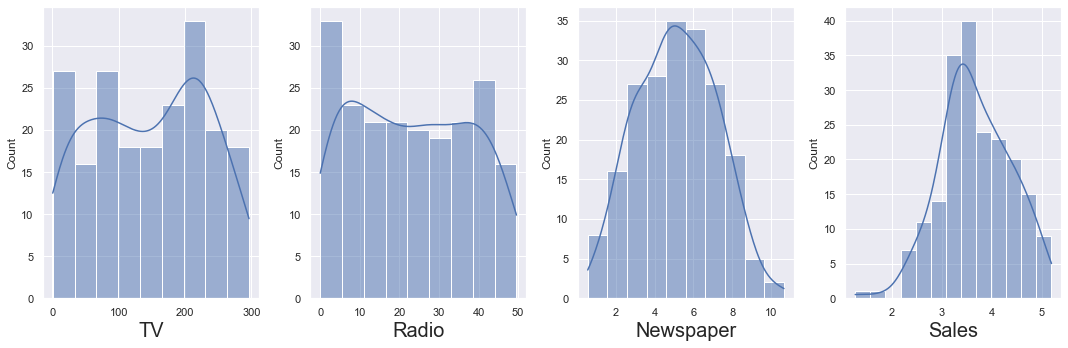

In [30]:
#After removing skewness 
plt.figure(figsize=(15,5),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax=plt.subplot(1,4,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
### Splitting Dataset 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 45)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
### Simple Linear Regression/ Multiple Linear Regression 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [ 0.56804036  0.34284126 -0.0022165 ]
Intercept : 3.652207354630619


In [35]:
y_pred = regressor.predict(x_test)

In [36]:
# Root Mean Square Error 

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.19541763129174197


In [37]:
#R-squared 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8950062734789106

In [38]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
r = sm.OLS(y_train, x_train_sm).fit()

In [39]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
r.params

array([ 3.65220735e+00,  5.68040356e-01,  3.42841264e-01, -2.21649678e-03])

In [40]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     353.0
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           2.75e-69
Time:                        11:08:31   Log-Likelihood:                -12.427
No. Observations:                 160   AIC:                             32.85
Df Residuals:                     156   BIC:                             45.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6522      0.021    174.431      0.0

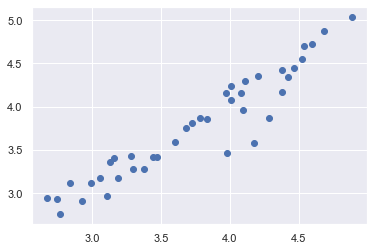

In [41]:
plt.scatter(y_pred,y_test)

<AxesSubplot:ylabel='Density'>

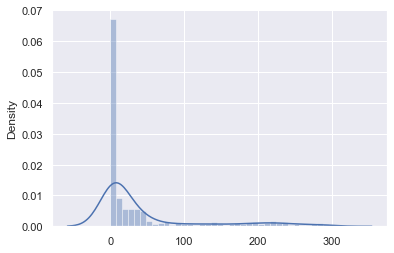

In [42]:
sns.distplot(df)

In [43]:
x_train.shape

(160, 3)

In [44]:
y_train.shape

(160,)

In [45]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()

svr=SVR()
knn=KNeighborsRegressor()
rfr=RandomForestRegressor()


In [46]:
def models(x_train,y_train):
    from sklearn.neighbors import KNeighborsRegressor
    knn=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    
    
    from sklearn.svm import SVR
    svr=SVR(kernel='rbf')
    svr.fit(x_train,y_train)
    
    
    
    from sklearn.tree import DecisionTreeRegressor
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    
    
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    
    #print model accuracy on training data

    print("[0]KNeighbors Classifier Training Accuracy :" ,knn.score(x_train,y_train))
    print("[1]]Linear Regression Training Accuracy :" ,lr.score(x_train,y_train))
    print("[2]SVR(rbf)Training Accuracy :" ,svr.score(x_train,y_train))
    
    
    print("[5]Decision Tree ClassifierTraining Accuracy :" ,dtr.score(x_train,y_train))
    print("[6]Random Forest Classifier Training Accuracy :" ,rfr.score(x_train,y_train))
    
    return knn,lr,svr,dtr,rfr
    

In [47]:
model=models(x_train,y_train)

[0]KNeighbors Classifier Training Accuracy : 0.9295879983481363
[1]]Linear Regression Training Accuracy : 0.8716006597451311
[2]SVR(rbf)Training Accuracy : 0.9573184839497327
[5]Decision Tree ClassifierTraining Accuracy : 1.0
[6]Random Forest Classifier Training Accuracy : 0.9951816610341002


In [48]:
model=[lr,dtr,rfr,svr,knn]

for i in model:
    
    i.fit(x_train,y_train)
    pred=i.predict(x_test)

   
    print(i.score(x_train,y_train))
    print('mean absolute error',mean_absolute_error(y_test,pred))
    print('mean square error', mean_squared_error(y_test,pred))
    print('root mean square error',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score',r2_score(y_test,pred))

0.8716006597451311
mean absolute error 0.14483810536263952
mean square error 0.038188050619675215
root mean square error 0.19541763129174197
r2_score 0.8950062734789106
1.0
mean absolute error 0.0905728985477647
mean square error 0.011916631331875465
root mean square error 0.10916332411517829
r2_score 0.967236569795816
0.9945346325813001
mean absolute error 0.06531591031692614
mean square error 0.006410589036808139
root mean square error 0.08006615412774701
r2_score 0.9823748104119525
0.9573184839497327
mean absolute error 0.06558592104953098
mean square error 0.0065124339070720015
root mean square error 0.08069965245942513
r2_score 0.9820947994587212
0.9295879983481363
mean absolute error 0.11556969997402426
mean square error 0.025315014105259222
root mean square error 0.15910692664136034
r2_score 0.9303992315733525


In [49]:
###Cross Validation

In [50]:
score=cross_val_score(lr,x,y,cv=9)
print('cross validation score of Logistic Regression model :',score.mean())

cross validation score of Logistic Regression model : 0.867123156033331


In [51]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.96658139 0.9568651  0.92646053 0.87106215 0.95083887]
0.934361605707271
0.03430822048981971


In [52]:
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.97621433 0.98061812 0.97505104 0.91412718 0.97994939]
0.9651920147461357
0.025620514555071566


In [53]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.9577803  0.96672096 0.97047447 0.88674461 0.94738803]
0.9458216704758854
0.030594451296454685


In [54]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.97483658 0.98494239 0.98971091 0.88807094 0.9802755 ]
0.9635672626753704
0.03806900111869116


In [55]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8716005821602274

In [56]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8716006597448034

In [57]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<AxesSubplot:>

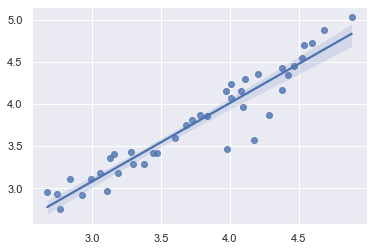

In [58]:
sns.regplot(x=y_pred,y=y_test)

In [73]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = i.predict(x_test)
print(result)

[3.89225917 3.22550861 3.94480565 4.84191049 3.52295316 3.19216828
 4.41073469 3.30743962 4.24887509 2.64745841 3.08526756 3.30743962
 3.38474568 4.14331009 3.91428571 2.75493131 3.76179234 3.07068746
 4.70695314 2.67133661 4.353447   2.90313833 3.61566083 3.23935234
 4.04898721 3.00961046 4.41814956 3.39737631 3.89445984 3.8714653
 4.85212748 4.57116578 4.29621935 4.01569865 3.32466365 3.35316194
 3.94056735 3.70390074 3.7924273  4.25894069]
